### [OpenAQ REST API](https://api.openaq.org/)

Napisz program w Pythonie, który pobierze dane na temat jakości powietrza we wskazanym mieście z publicznego API "OpenAQ REST API" i wyświetli informacje na temat stężenia [pyłów pm2.5](https://pl.wikipedia.org/wiki/PM2,5)  na wykresie.

#### Pobranie danych  o powietrzu w danym mieście

In [1]:
import requests

url = "https://api.openaq.org/v1/measurements?city=Warszawa&limit=100&parameter=pm25"

response = requests.get(url)
data = response.json()
results = data['results']
results

[{'location': 'Warszawa, ul. Bajkowa',
  'parameter': 'pm25',
  'value': 9.9,
  'date': {'utc': '2024-06-09T09:00:00+00:00',
   'local': '2024-06-09T11:00:00+02:00'},
  'unit': 'µg/m³',
  'coordinates': {'latitude': 52.188474, 'longitude': 21.176233},
  'country': 'PL',
  'city': None},
 {'location': 'Warszawa, ul. Wokalna',
  'parameter': 'pm25',
  'value': 11.4,
  'date': {'utc': '2024-06-09T09:00:00+00:00',
   'local': '2024-06-09T11:00:00+02:00'},
  'unit': 'µg/m³',
  'coordinates': {'latitude': 52.160772, 'longitude': 21.033819},
  'country': 'PL',
  'city': None},
 {'location': 'Warszawa, al. Niepodległości',
  'parameter': 'pm25',
  'value': 16.2,
  'date': {'utc': '2024-06-09T09:00:00+00:00',
   'local': '2024-06-09T11:00:00+02:00'},
  'unit': 'µg/m³',
  'coordinates': {'latitude': 52.219298, 'longitude': 21.004724},
  'country': 'PL',
  'city': None},
 {'location': 'Warszawa, ul. Chrościckiego',
  'parameter': 'pm25',
  'value': 7.6,
  'date': {'utc': '2024-06-09T09:00:00+00:0

In [2]:
import datetime

pm25_levels = [item['value'] for item in results]
date = [datetime.datetime.strptime(item['date']['utc'], "%Y-%m-%dT%H:%M:%S%z") for item in results]

pm25_levels

[9.9,
 11.4,
 16.2,
 7.6,
 11.7,
 16.2,
 11.2,
 9.0,
 10.3,
 12.1,
 17.75,
 19.4,
 14.6,
 9.9,
 12.1,
 12.8,
 10.6,
 14.3,
 10.0,
 14.4,
 11.1,
 20.48,
 13.0,
 10.3,
 16.3,
 14.4,
 12.0,
 14.6,
 20.48,
 12.3,
 14.3,
 16.8,
 10.8,
 15.4,
 12.8,
 9.0,
 10.4,
 15.5,
 13.1,
 12.6,
 11.5,
 10.4,
 11.6,
 7.3,
 12.5,
 15.27,
 9.1,
 13.7,
 15.6,
 13.0,
 11.4,
 14.2,
 14.0,
 18.2,
 18.3,
 20.25,
 14.0,
 14.2,
 11.4,
 18.2,
 18.3,
 16.7,
 17.4,
 21.9,
 14.1,
 10.9,
 15.4,
 12.6,
 16.3,
 15.8,
 15.4,
 10.6,
 15.0,
 9.6,
 14.2,
 14.2,
 12.2,
 20.84,
 13.3,
 8.2,
 11.4,
 10.8,
 11.8,
 19.07,
 9.2,
 9.5,
 9.5,
 16.8,
 13.5,
 7.5,
 8.7,
 6.8,
 5.8,
 8.0,
 13.6,
 4.2,
 11.1,
 6.0,
 8.3,
 6.5]

#### Analiza i wizualizacja danych

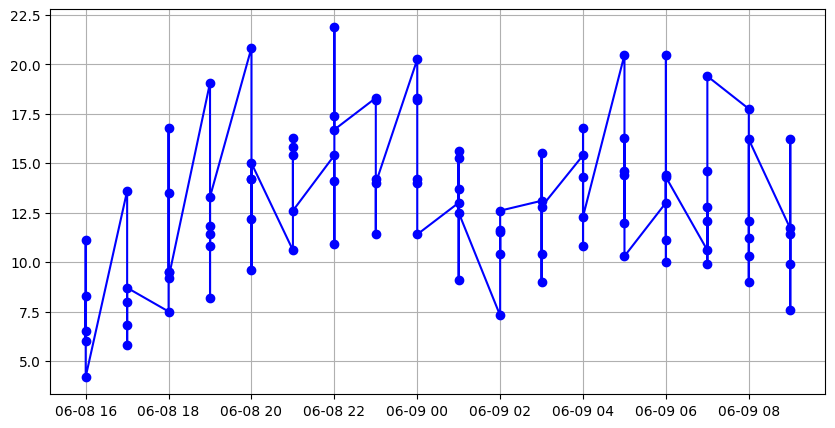

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(date, pm25_levels, marker='o', linestyle='-', color='b')
plt.grid()
plt.show()